# 02.3 Overall Health by State - Correlations

1. Imports and display options
1. Reducing dataset
1. Correlation heatmaps
1. Correlation heatlines
1. Pair plot
1. Conclusion

## 1. Imports and display options

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\Documents\Data Analyses\BRFSS'

In [3]:
#Importing products.csv to df_prods
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'BRFSS Overall Health by State TABLEAU.pkl'))

In [4]:
#Checking df

df.shape

(385, 35)

In [5]:
#Checking df

df.head()

,location,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,...,Vegetables eaten: Daily,Vegetables eaten: Not daily,Aerobic activity per week: Over 150 min,Aerobic activity per week: Under 150 min,Met physical activity guidelines: Yes,Met physical activity guidelines: No,Strength training: 2x+ per week,Strength training: 1x- per week,Physically active in last month: Yes,Physically active in last month: No
0,Alabama,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,...,72.2,27.8,44.6,55.4,16.7,83.3,25.8,74.2,68.1,31.9
1,Alabama,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6,29.4
2,Alabama,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,...,80.7,19.3,42.8,57.2,16.1,83.9,26.0,74.0,68.0,32.0
3,Alabama,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3,30.7
4,Alabama,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,...,77.7,22.3,44.8,55.2,17.6,82.4,29.2,70.8,68.5,31.5


In [6]:
#Expanding max window size

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

# 2. Reducing dataset

In [7]:
# Dropping national averages to reduce redundant information.

df = df.loc[(df['location'] != 'All States and DC (median) **') &
            (df['location'] != 'All States, DC and Territories (median) **')]

In [8]:
# Getting column names

df.columns

Index(['location', 'year', 'BMI: Obese (BMI 30.0 - 99.8)',
       'BMI: Overweight (BMI 25.0-29.9)', 'BMI: Normal Weight (BMI 18.5-24.9)',
       'BMI: Underweight (BMI 12.0-18.4)', 'General health: Excellent',
       'General health: Very good', 'General health: Good',
       'General health: Fair', 'General health: Poor',
       'Health status: Good or Better', 'Health status: Fair or Poor',
       'Doc visit: Past year', 'Doc visit: Past 2 years',
       'Doc visit: Past 5 years', 'Doc visit: 5+ years ago',
       'Doc visit: Never', 'Concentrate, remember, decide: Difficult',
       'Concentrate, remember, decide: Not difficult',
       'Bad mental health days: 0', 'Bad mental health days: 1-13',
       'Bad mental health days: 14+', 'Fruit eaten: Daily',
       'Fruit eaten: Not daily', 'Vegetables eaten: Daily',
       'Vegetables eaten: Not daily',
       'Aerobic activity per week: Over 150 min',
       'Aerobic activity per week: Under 150 min',
       'Met physical activity g

In [9]:
# Dropping location, calculated health statuses, and negative response to binary question pairs, 
# i.e.: keeping 'Fruit eaten: Daily' and dropping 'Fruit eaten: Not daily'.

eva = df.drop(columns=['location',
                       'Health status: Good or Better',
                       'Health status: Fair or Poor',
                      'Concentrate, remember, decide: Not difficult',
                      'Fruit eaten: Not daily',
                      'Vegetables eaten: Not daily',
                      'Aerobic activity per week: Under 150 min',
                      'Met physical activity guidelines: No',
                      'Strength training: 1x- per week',
                      'Physically active in last month: No'])

In [10]:
#Checking changes

eva.head()

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
0,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,7.0,...,15.0,NaN,NaN,NaN,51.7,72.2,44.6,16.7,25.8,68.1
1,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,6.9,...,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6
2,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,7.1,...,15.8,NaN,NaN,NaN,55.2,80.7,42.8,16.1,26.0,68.0
3,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,7.2,...,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3
4,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,6.5,...,16.7,58.0,24.5,17.5,53.9,77.7,44.8,17.6,29.2,68.5


# 3. Correlation heatmap

### 3.1 Correlation matrix

In [11]:
#making a correlation matrix

eva_corr = eva.corr()

In [12]:
#checking matrix

eva_corr

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
year,1.000000,0.325689,-0.263868,-0.267435,0.029964,0.200750,0.081953,-0.086747,-0.122721,-0.236423,...,0.228706,-0.160242,0.095227,0.179699,-0.046130,0.094670,-0.074399,0.229031,0.412712,0.103127
BMI: Obese (BMI 30.0 - 99.8),0.325689,1.000000,-0.450781,-0.935347,-0.237259,-0.572027,-0.282873,0.384092,0.381786,0.508218,...,0.615905,0.042773,-0.335352,0.488944,-0.631581,-0.250785,-0.606930,-0.529572,-0.332199,-0.501806
BMI: Overweight (BMI 25.0-29.9),-0.263868,-0.450781,1.000000,0.117113,-0.145991,0.195338,0.076519,-0.093400,-0.083702,-0.280865,...,-0.352458,0.302776,-0.123959,-0.425646,0.214411,-0.020652,0.132310,0.061241,-0.040451,0.098864
BMI: Normal Weight (BMI 18.5-24.9),-0.267435,-0.935347,0.117113,1.000000,0.233033,0.565827,0.318066,-0.412667,-0.415398,-0.474996,...,-0.569585,-0.168416,0.429781,-0.386227,0.630186,0.296571,0.623339,0.553894,0.372165,0.535242
BMI: Underweight (BMI 12.0-18.4),0.029964,-0.237259,-0.145991,0.233033,1.000000,0.076917,-0.259399,0.126608,0.129242,0.089297,...,0.097210,-0.115528,0.061581,0.134047,0.010069,0.004456,0.019022,0.127406,0.138107,-0.017818
General health: Excellent,0.200750,-0.572027,0.195338,0.565827,0.076917,1.000000,0.305070,-0.682051,-0.490730,-0.718533,...,-0.505136,0.208306,0.038439,-0.505754,0.457757,0.108900,0.474723,0.452853,0.296166,0.450376
General health: Very good,0.081953,-0.282873,0.076519,0.318066,-0.259399,0.305070,1.000000,-0.600902,-0.900682,-0.501727,...,-0.530329,-0.466647,0.683004,-0.189779,0.637769,0.647139,0.678181,0.573105,0.524986,0.756512
General health: Good,-0.086747,0.384092,-0.093400,-0.412667,0.126608,-0.682051,-0.600902,1.000000,0.485247,0.396736,...,0.245825,0.113178,-0.273670,0.232289,-0.431532,-0.349428,-0.384137,-0.250298,-0.119885,-0.421167
General health: Fair,-0.122721,0.381786,-0.083702,-0.415398,0.129242,-0.490730,-0.900682,0.485247,1.000000,0.570498,...,0.641318,0.330508,-0.600625,0.335716,-0.652918,-0.603594,-0.738968,-0.679279,-0.631604,-0.822300
General health: Poor,-0.236423,0.508218,-0.280865,-0.474996,0.089297,-0.718533,-0.501727,0.396736,0.570498,1.000000,...,0.731724,-0.081480,-0.296193,0.679643,-0.547642,-0.175170,-0.518233,-0.530998,-0.434833,-0.577044


In [13]:
#Setting insignificant correlations to 0

columns = eva_corr.columns

for indices, row in eva_corr.iterrows():
    for column in columns:
        if abs(eva_corr.at[indices,column]) < 0.1:
            eva_corr.at[indices,column] = 0

In [14]:
#making heatmap mask

mask = np.zeros_like(eva_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

### 3.2 All Correlations

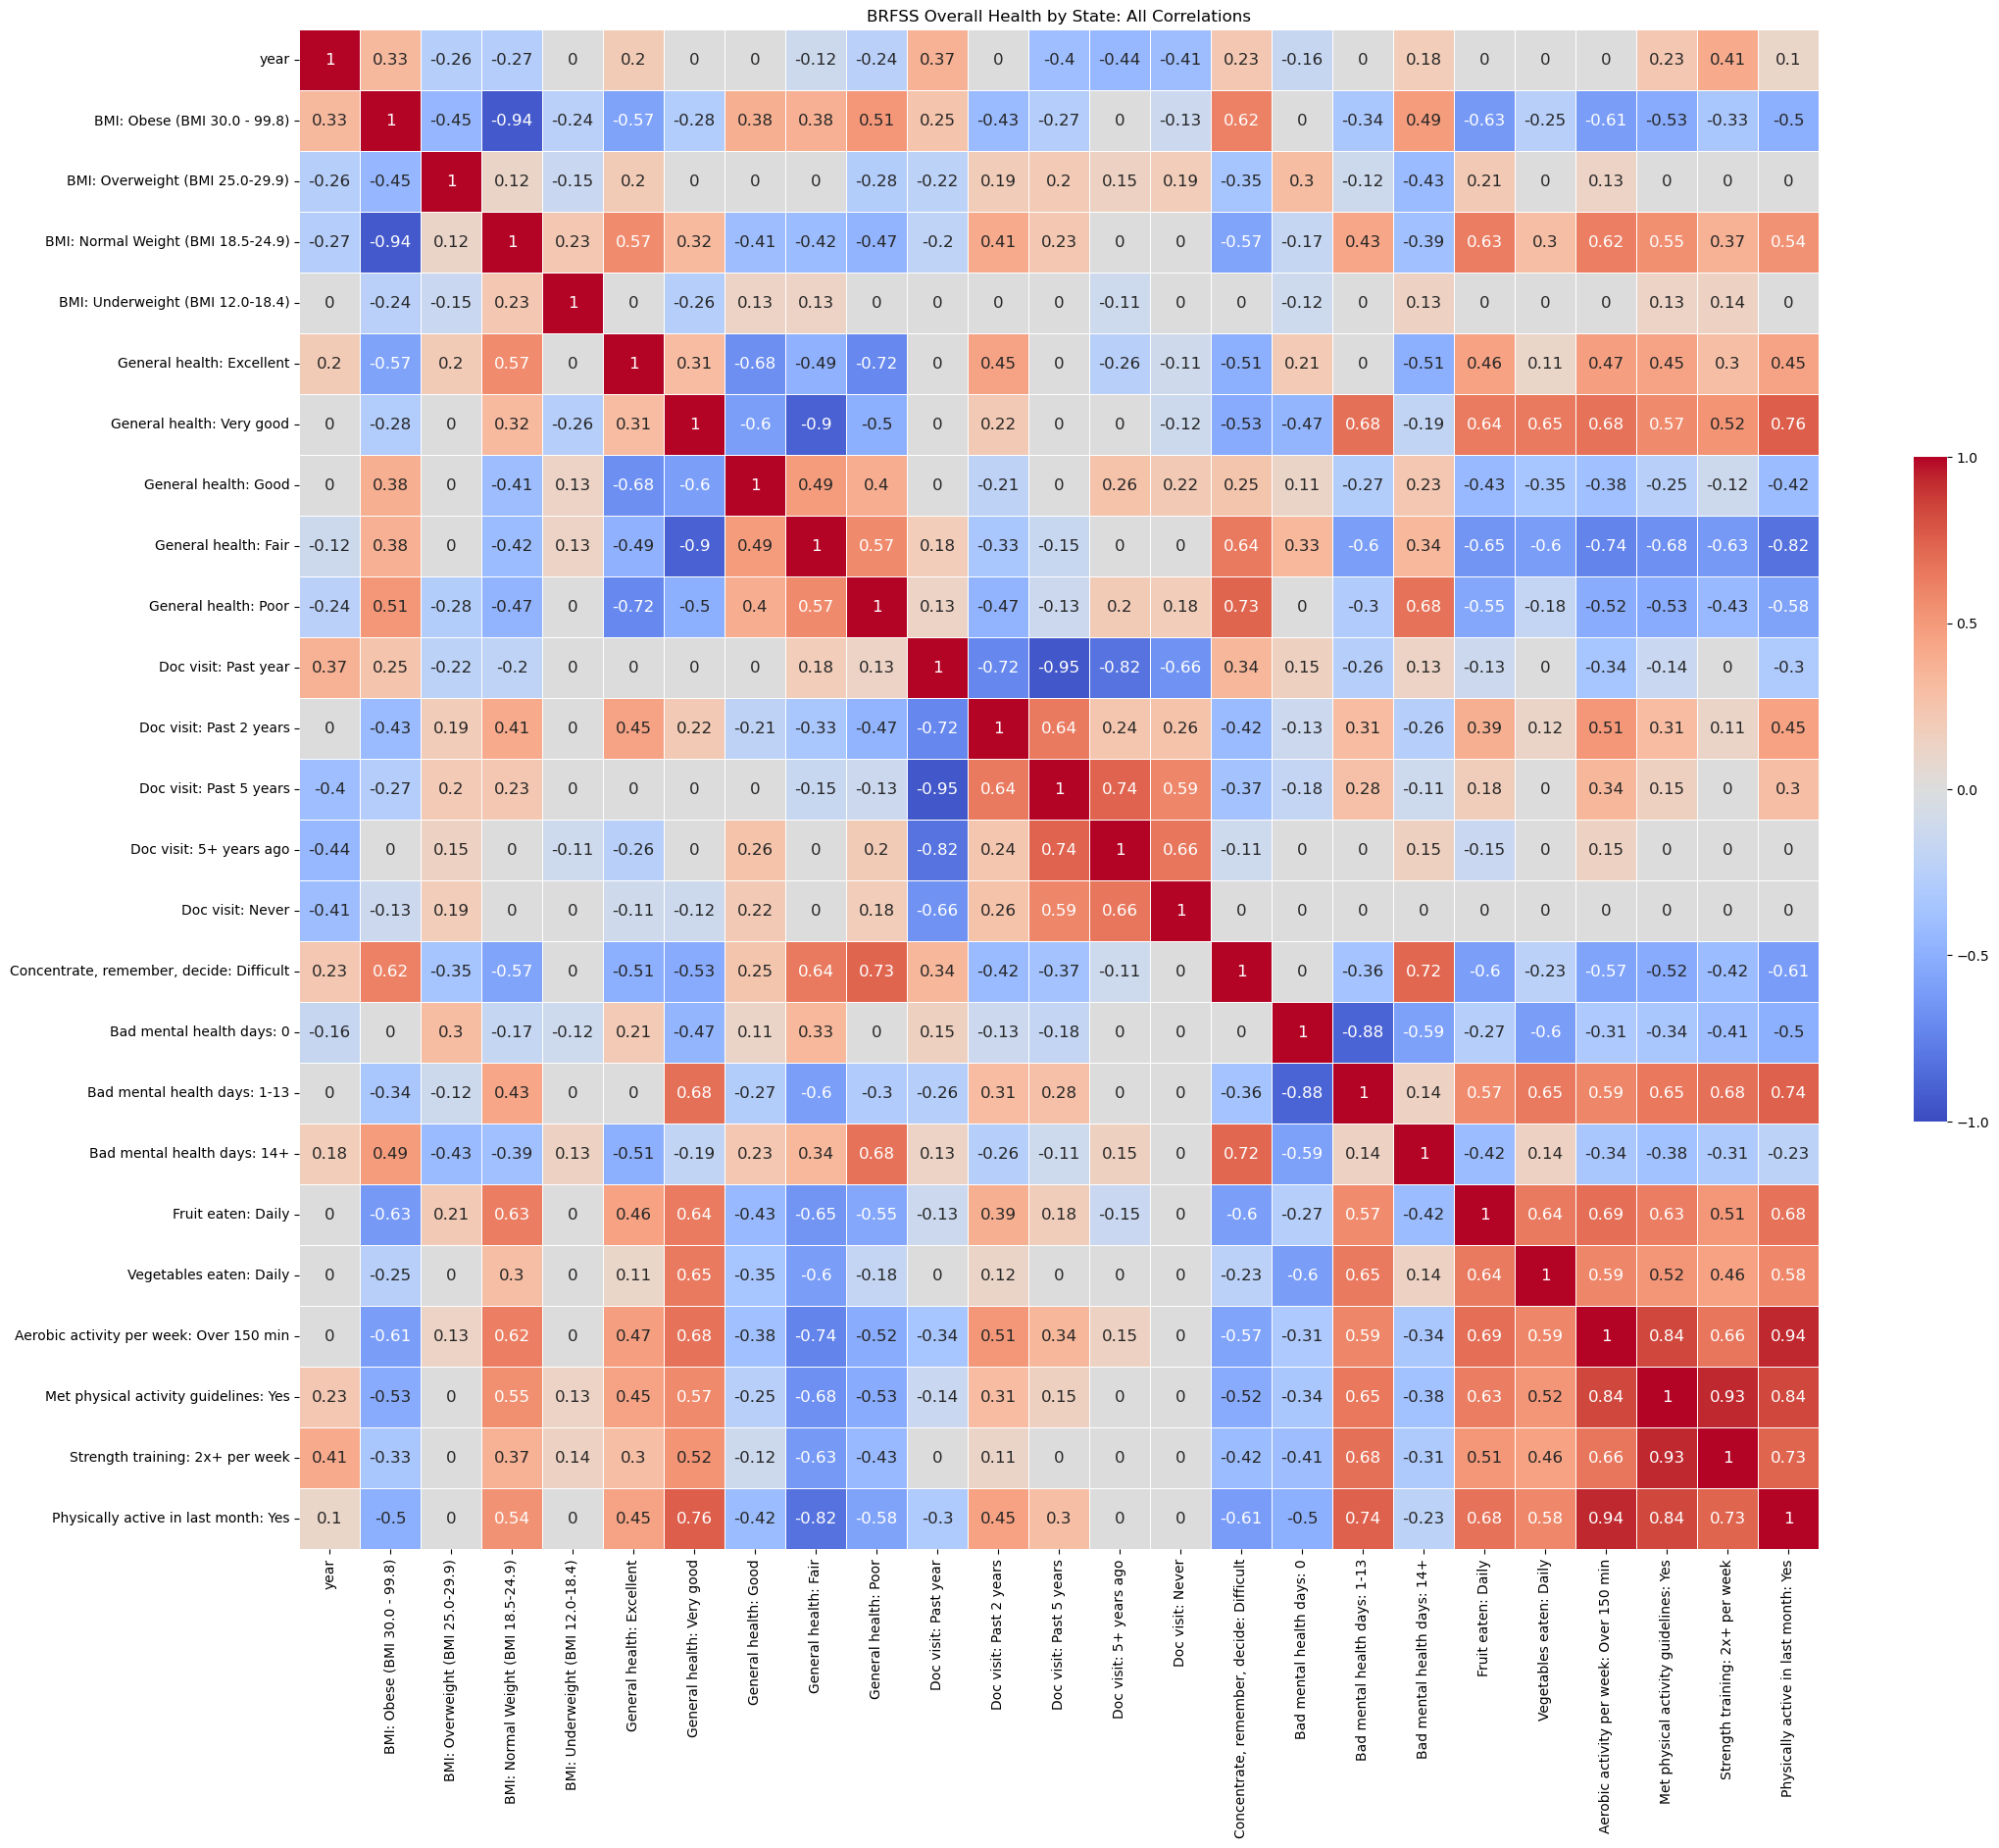

In [15]:
#eva_corr heatmap

f, ax = plt.subplots(figsize=(25, 22))  
heatmap = sns.heatmap(eva_corr, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(eva_corr.columns, rotation = 0)
ax.set_xticklabels(eva_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: All Correlations')

heatmap.figure.savefig('corr_heatmap_ALL.png')

<div class='alert alert-block alert-info'>
    With this many correlations, it is hard to make sense of the information. Making three correlation heatmaps that show just the strong correlations, just the moderate correlations, and just the weak correlations will help prioritize the information and give a hierarchy to the next steps in the analysis.
   </div>

### 3.3 Strong Correlations

In [16]:
#Setting non-strong correlations to 0

strong_corr = eva_corr.copy()
columns = strong_corr.columns

for indices, row in strong_corr.iterrows():
    for column in columns:
        if abs(strong_corr.at[indices,column]) < 0.5:
            strong_corr.at[indices,column] = 0

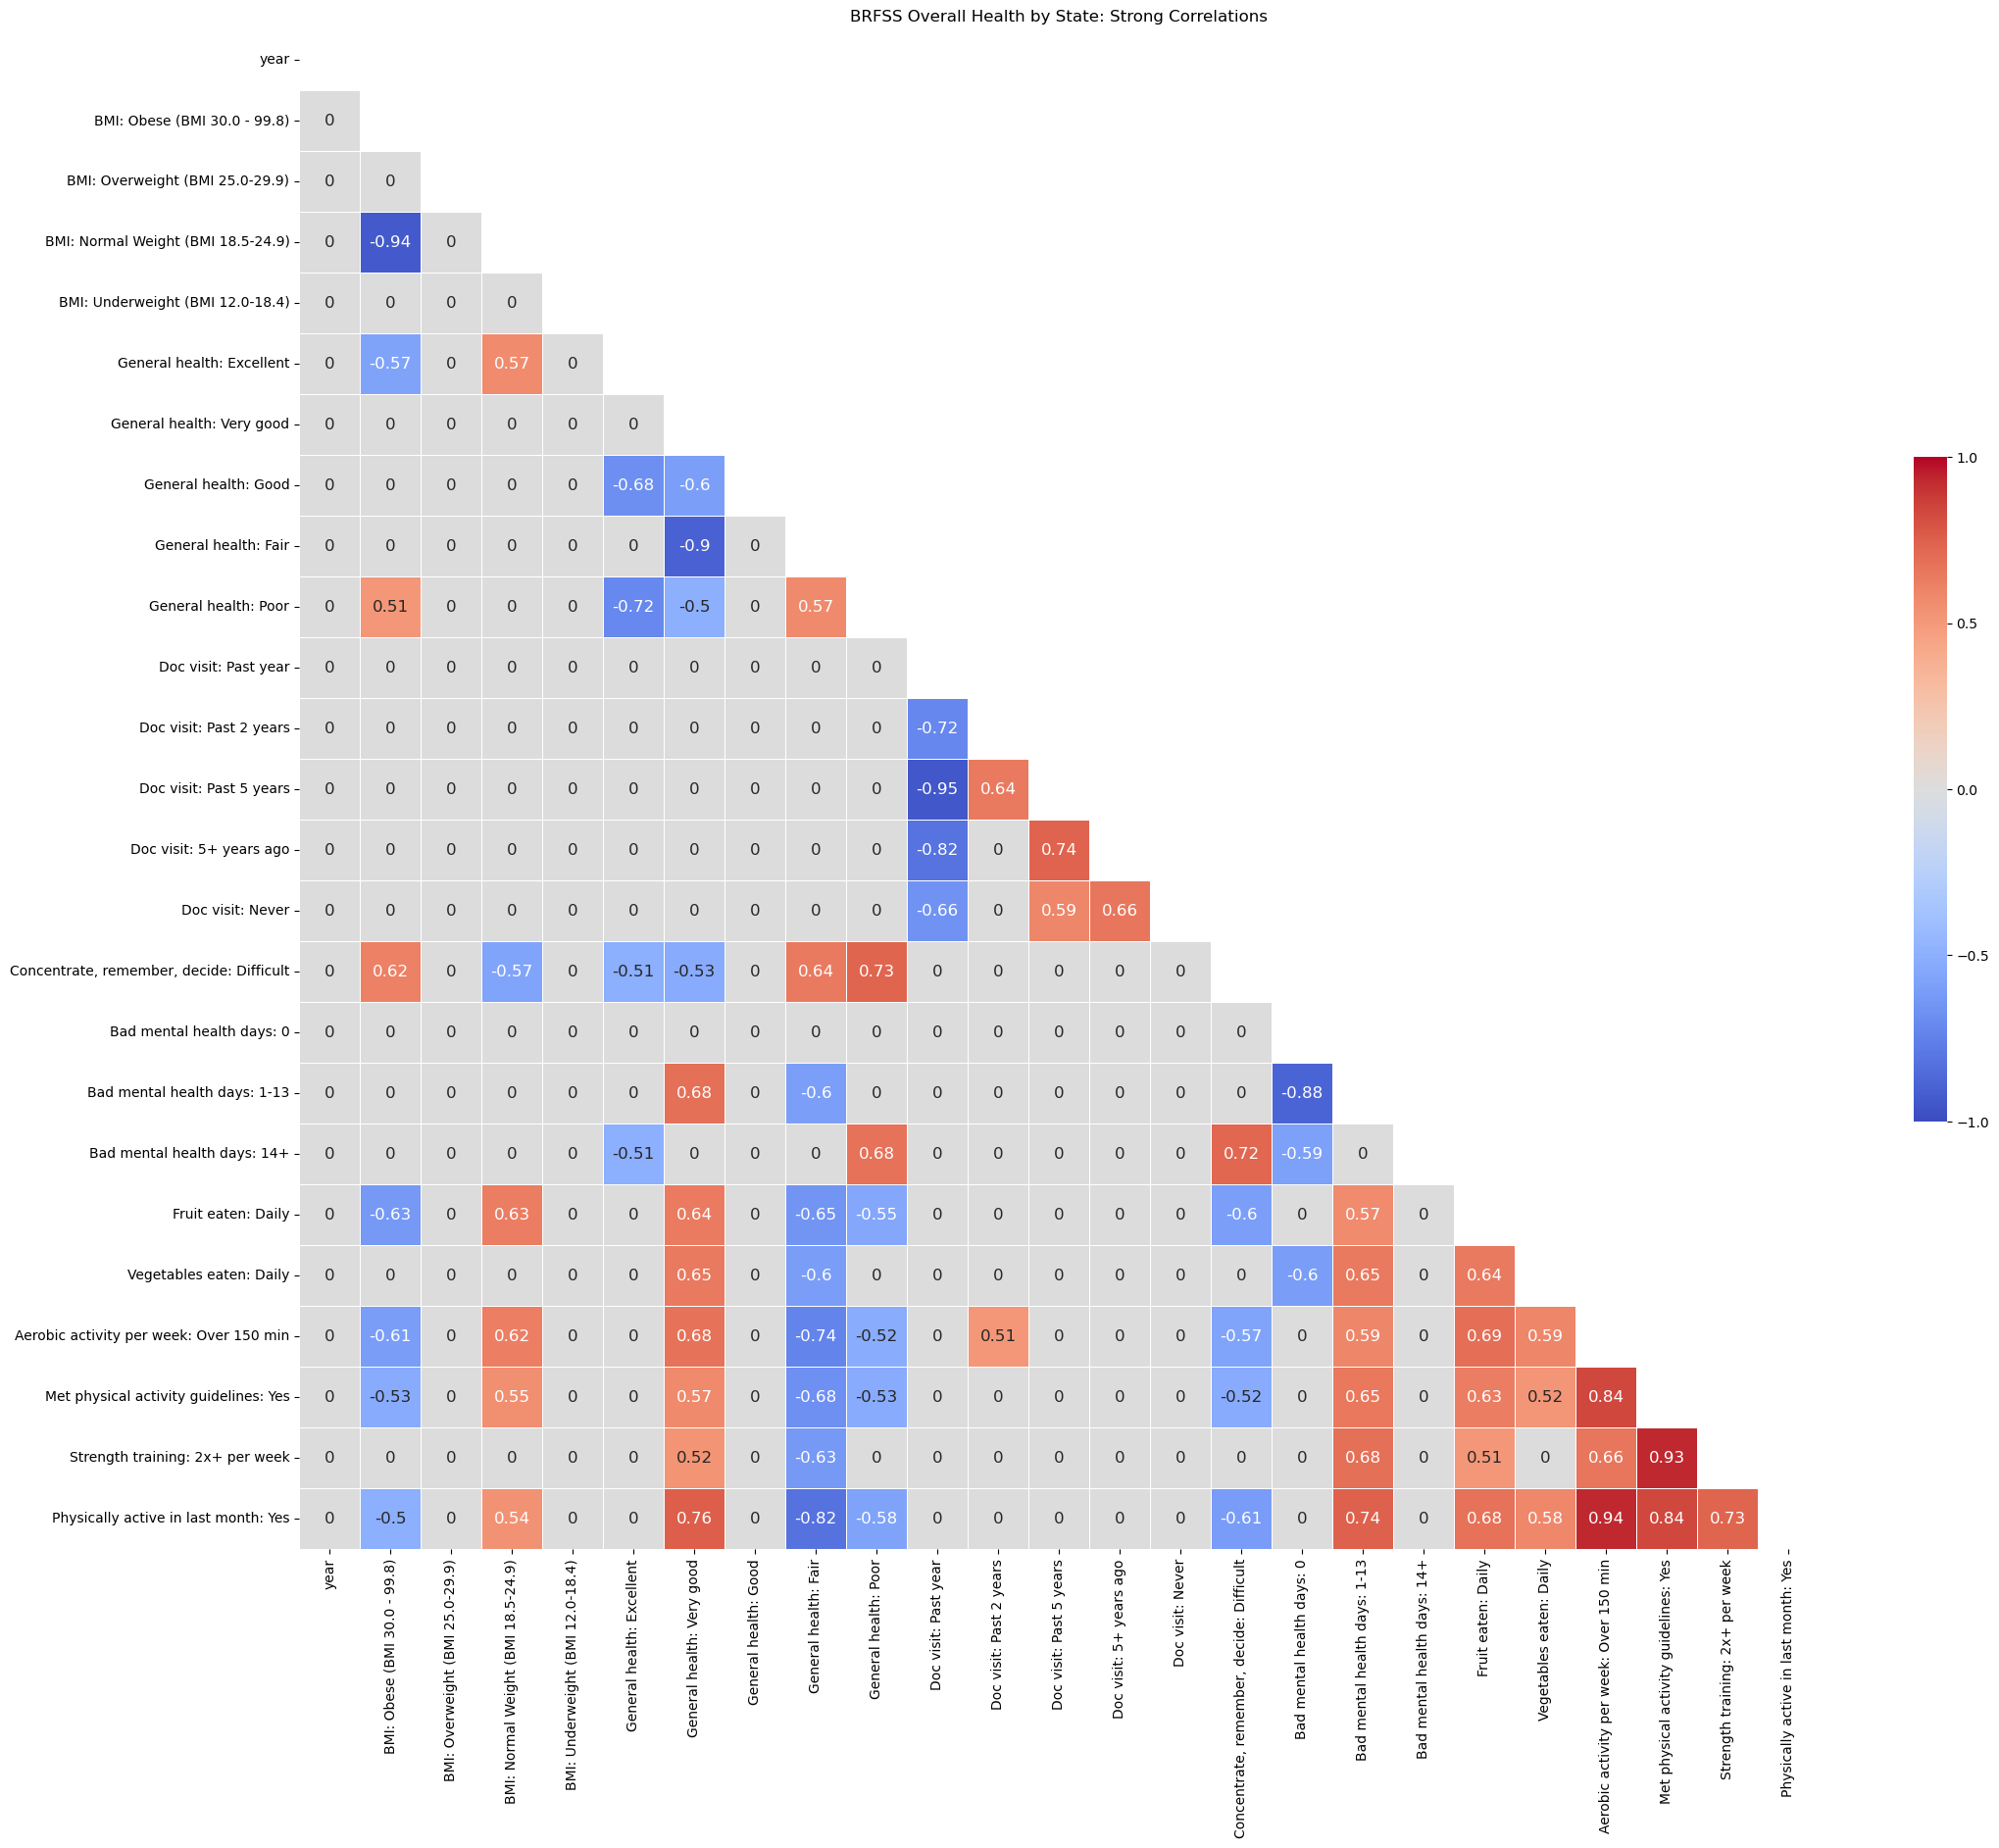

In [17]:
#eva_corr heatmap

f, ax = plt.subplots(figsize=(25, 22)) 
heatmap = sns.heatmap(strong_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(strong_corr.columns, rotation = 0)
ax.set_xticklabels(strong_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Strong Correlations')

heatmap.figure.savefig('corr_heatmap_STRONG.png')

<div class='alert alert-block alert-info'>
     <b>Variables with the most strong correlations:</b><br>
     <li>Concentrate, remember, decide: Difficult<br>
     <li>Bad mental health days: 1-13<br>
     <li>Fruit eaten: Daily<br>
     <li>Vegetables eaten: Daily<br>
     <li>Aerobic activity per week: Over 150 min<br>
     <li>Met physical activity guidelines: Yes<br>
     <li>Physically active in the last month<br>   
     <br>
     <b>The strongest correlations exist between:</b><br>
     <li>Concentrate, remember, decide: Difficult and General health: Poor (0.73)<br>
     <li>Concentrate, remember, decide: Difficult and Bad mental health days: 14+ (0.72)<br>
     <li>Aerobic activity per week: Over 150 min and General health: Fair (-0.74)<br>
     <li>Physically active in the last month and General health: Very good (0.76)<br>
     <li>Physically active in the last month and General health: Fair (-0.82)<br>
     <li>Physically active in the last month and Bad mental health days: 1-13 (0.74)<br>
     <br>
    <em>Correlations where a variable crossed with another variable in the same category - i.e., Doc visits: Past 5 years and Doc visitis: Past year (-0.95) - were ignored as they do not contain useful correlation information.
   </div>

### 3.4 Moderate Correlations

In [18]:
#Setting non-moderate correlations to 0

mod_corr = eva_corr.copy()
columns = mod_corr.columns

for indices, row in mod_corr.iterrows():
    for column in columns:
        if ((abs(mod_corr.at[indices,column]) >= 0.5) | (abs(mod_corr.at[indices,column]) < 0.3)):
            mod_corr.at[indices,column] = 0

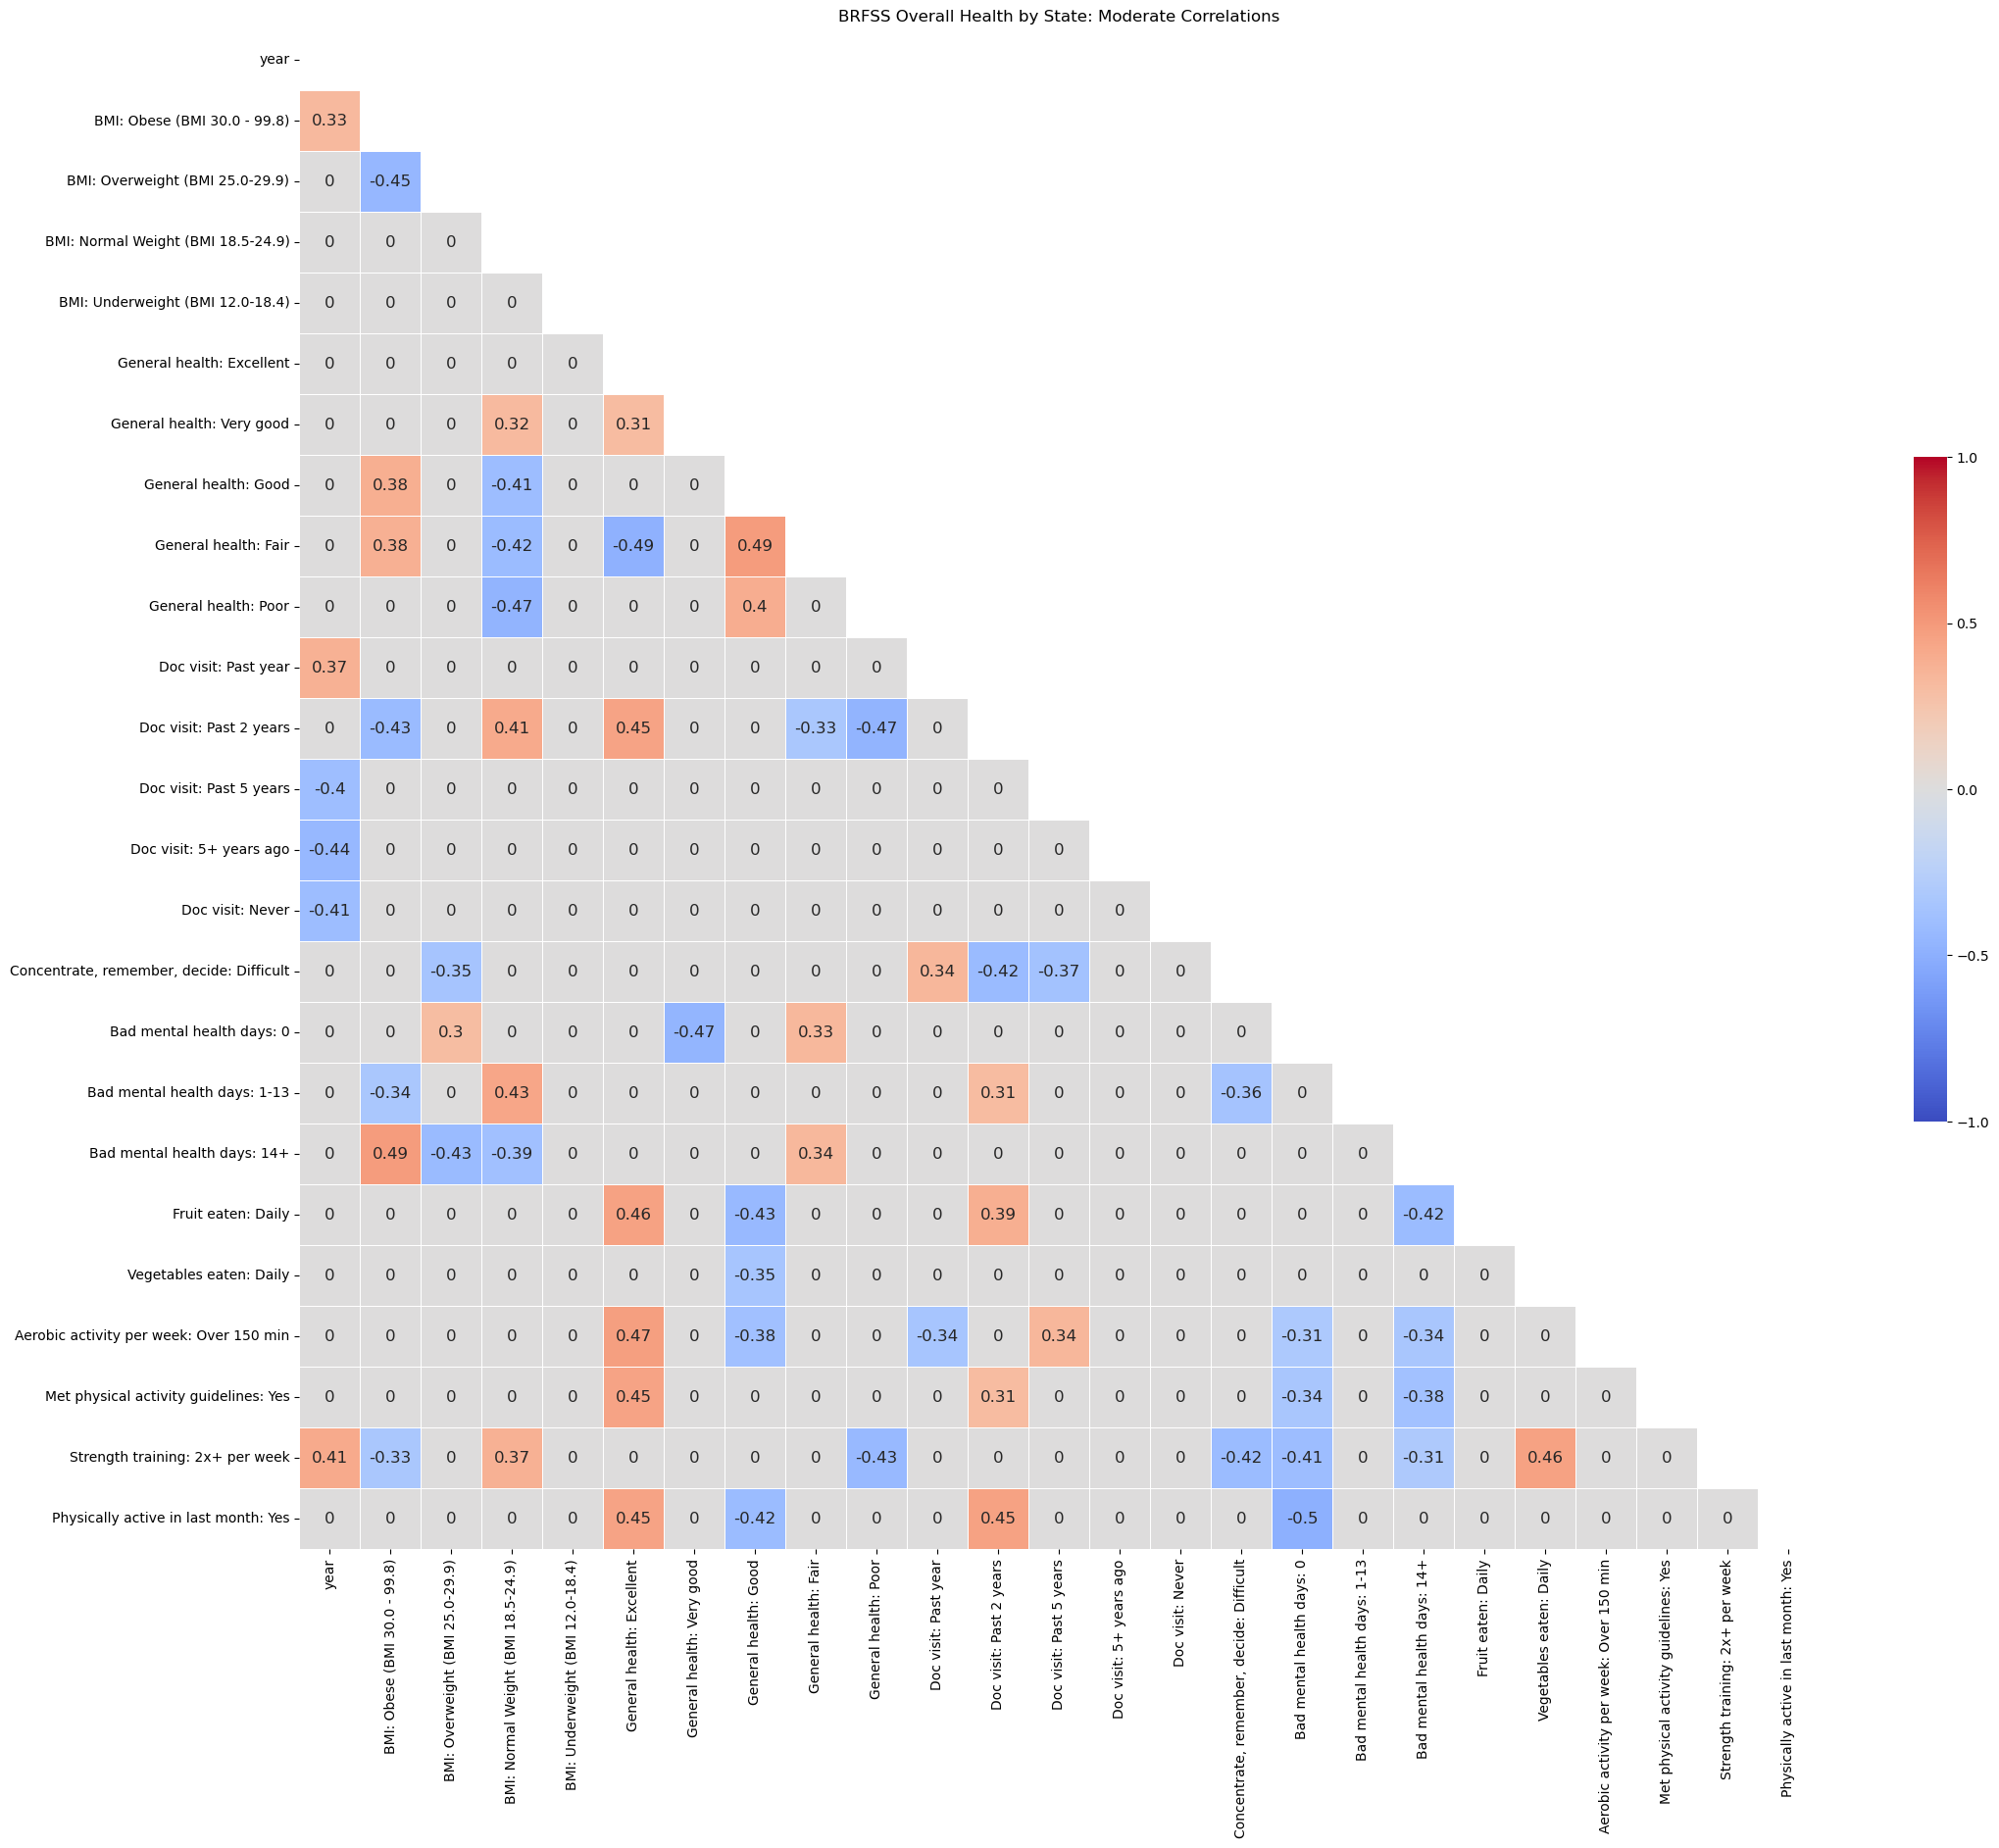

In [19]:
#eva_corr heatmap

f, ax = plt.subplots(figsize=(25, 22)) 
heatmap = sns.heatmap(mod_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(mod_corr.columns, rotation = 0)
ax.set_xticklabels(mod_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Moderate Correlations')

heatmap.figure.savefig('corr_heatmap_MODERATE.png')

<div class='alert alert-block alert-info'>
     <b>Variables with the most moderate correlations:</b><br>
     <li>Year<br>
     <li>BMI:Obese (BMI 30.0-99.8)<br>
     <li>BMI:Normal weight (BMI 18.5-29.9)<br>
     <li>General health: Good<br>
     <li>Doc visitis: Past 2 years<br>
     <li>Bad mental health days:0<br>
     <li>Bad mental health days:14+<br>
     <li>Aerobic activity per week: Over 150 min<br> 
     <li>Strength train: 2x+ per week<br> 
     <br>
    <em>Correlations where a variable crossed with another variable in the same category - i.e., General health: Fair and General health: Excellent (-0.49) - were ignored as they do not contain useful correlation information.
   </div>

### 3.5 Weak Correlations

In [20]:
#Setting non-weak correlations to 0

weak_corr = eva_corr.copy()
columns = weak_corr.columns

for indices, row in weak_corr.iterrows():
    for column in columns:
        if (abs(weak_corr.at[indices,column]) >= 0.3):
            weak_corr.at[indices,column] = 0

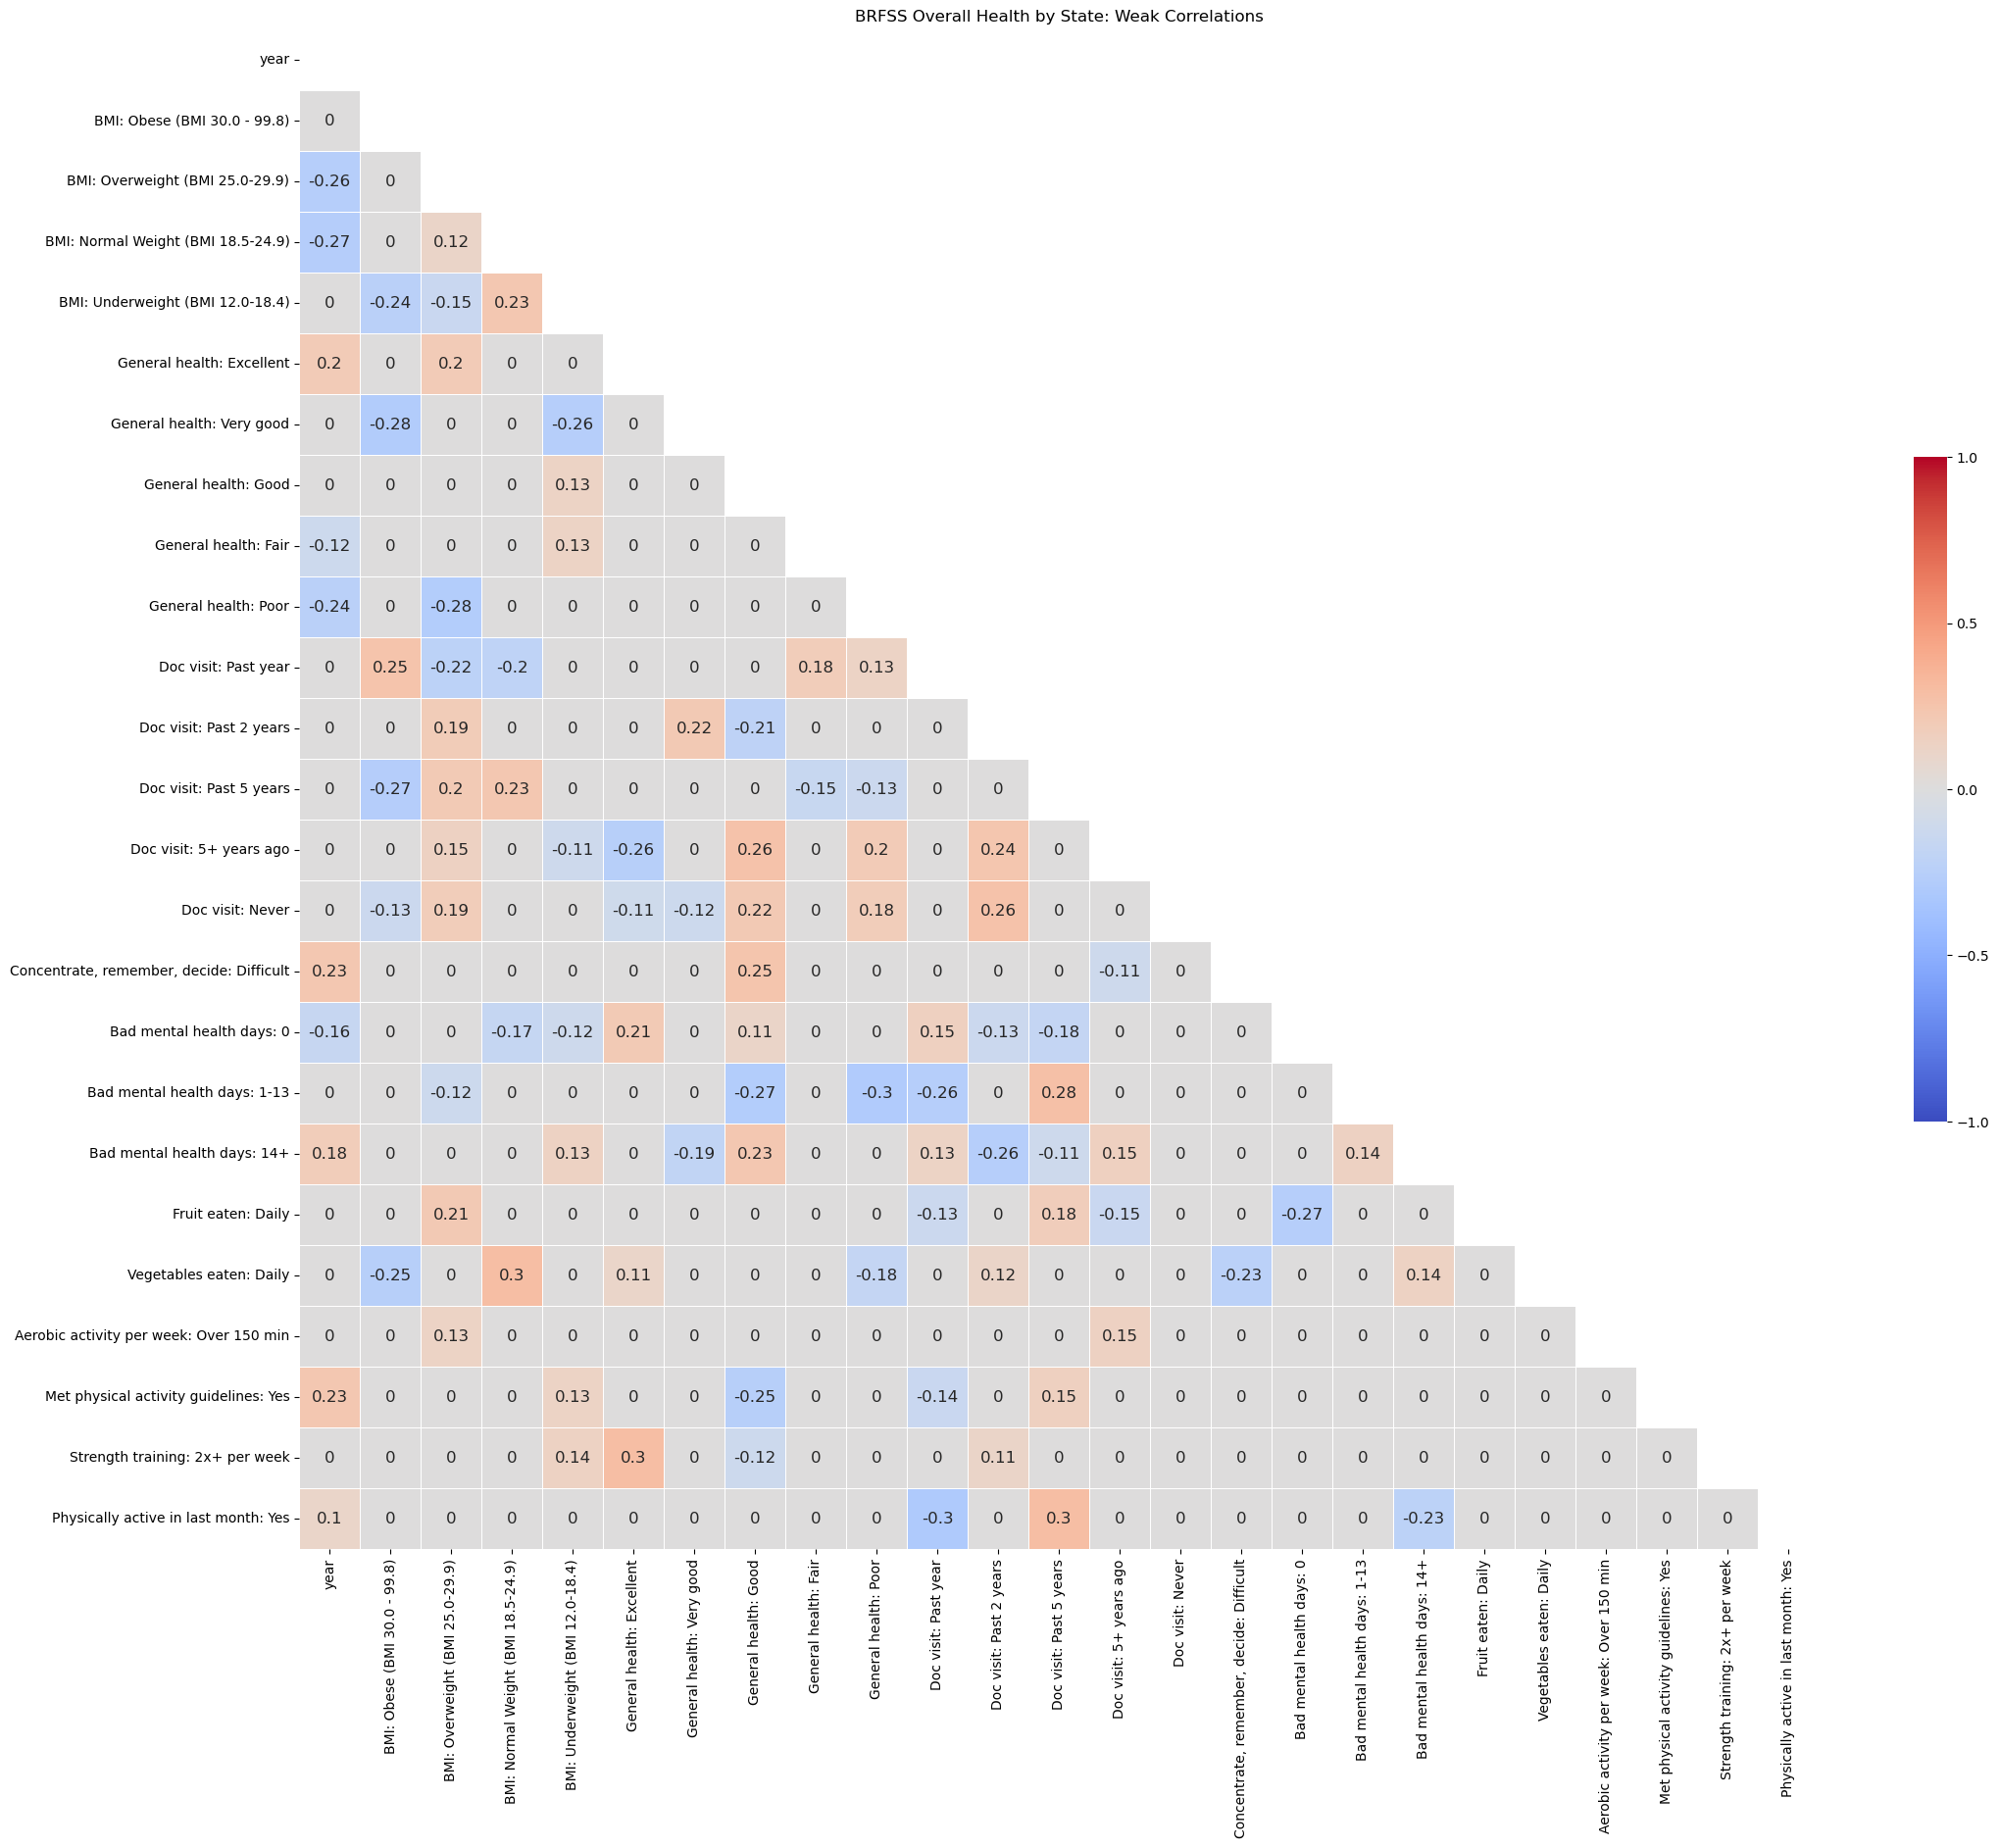

In [21]:
#eva_corr heatmap

f, ax = plt.subplots(figsize=(25, 22)) 
heatmap = sns.heatmap(weak_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(weak_corr.columns, rotation = 0)
ax.set_xticklabels(weak_corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Weak Correlations')

heatmap.figure.savefig('corr_heatmap_WEAK.png')

<div class='alert alert-block alert-info'>
     With plenty of strong and moderate correlations to look into, weak correlations will be considered not relevant for now.
   </div>

# 4. Correlation heatlines

The abundance of strong and moderate correlations left many possible directions to follow. Some varables had many strong and moderate correlations and will be priorities for linear regressions. Examining correlations within categories of responses (i.e., year, BMIs, general health, etc.) might also provide some structure to help understand relationships between different health factors. Thus, heatlines (or heatmaps focusing on specific categories) will be made.

### 4.1 Year heatline

In [41]:
# Making a correlation line

heatline = eva_corr.loc[:'year']
heatline = heatline.drop(columns = 'year').copy()
heatline

,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,Doc visit: Past year,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
year,0.325689,-0.263868,-0.267435,0.0,0.20075,0.0,0.0,-0.122721,-0.236423,0.368654,...,0.228706,-0.160242,0.0,0.179699,0.0,0.0,0.0,0.229031,0.412712,0.103127


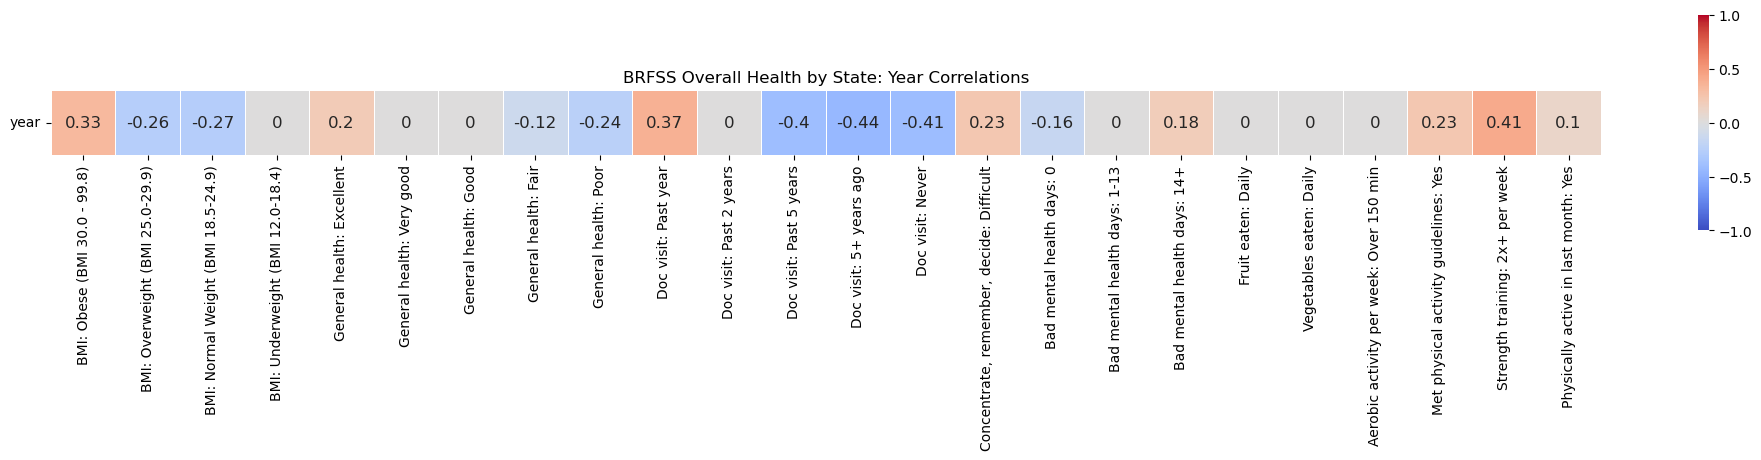

year correlations - 0 strong, 6 moderate, 10 weak, 16 total.


In [44]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 7)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Year Correlations')

heatmap.figure.savefig('corr_heatline_YEAR.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li>Moderate and weak correlations exist in the BMI category.<br>
    <li>Weak correlations exist in the General Health category.<br>
    <li>Moderate correlations exist in the Doc visits category.<br>
    <li>Weak correaltions exist in the Mental Health category.<br>
    <li>Moderate and weak correlations exist in the Physical Acticity category.<br>
    <br>
        <b>A temporal analysis would be useful to visualize these trends.</b>
   </div>

### 4.2 BMI heatline

In [39]:
# Making a correlation line

index_list = ['BMI: Obese (BMI 30.0 - 99.8)',
              'BMI: Overweight (BMI 25.0-29.9)',
              'BMI: Normal Weight (BMI 18.5-24.9)',
              'BMI: Underweight (BMI 12.0-18.4)']

heatline = eva_corr[eva_corr.index.isin(index_list)]
heatline = heatline.drop(columns = index_list).copy()
heatline

,year,General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,Doc visit: Past year,Doc visit: Past 2 years,Doc visit: Past 5 years,Doc visit: 5+ years ago,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
BMI: Obese (BMI 30.0 - 99.8),0.325689,-0.572027,-0.282873,0.384092,0.381786,0.508218,0.253473,-0.427913,-0.271853,0.000000,...,0.615905,0.000000,-0.335352,0.488944,-0.631581,-0.250785,-0.606930,-0.529572,-0.332199,-0.501806
BMI: Overweight (BMI 25.0-29.9),-0.263868,0.195338,0.000000,0.000000,0.000000,-0.280865,-0.221850,0.188822,0.204033,0.145322,...,-0.352458,0.302776,-0.123959,-0.425646,0.214411,0.000000,0.132310,0.000000,0.000000,0.000000
BMI: Normal Weight (BMI 18.5-24.9),-0.267435,0.565827,0.318066,-0.412667,-0.415398,-0.474996,-0.204606,0.410509,0.231953,0.000000,...,-0.569585,-0.168416,0.429781,-0.386227,0.630186,0.296571,0.623339,0.553894,0.372165,0.535242
BMI: Underweight (BMI 12.0-18.4),0.000000,0.000000,-0.259399,0.126608,0.129242,0.000000,0.000000,0.000000,0.000000,-0.112644,...,0.000000,-0.115528,0.000000,0.134047,0.000000,0.000000,0.000000,0.127406,0.138107,0.000000


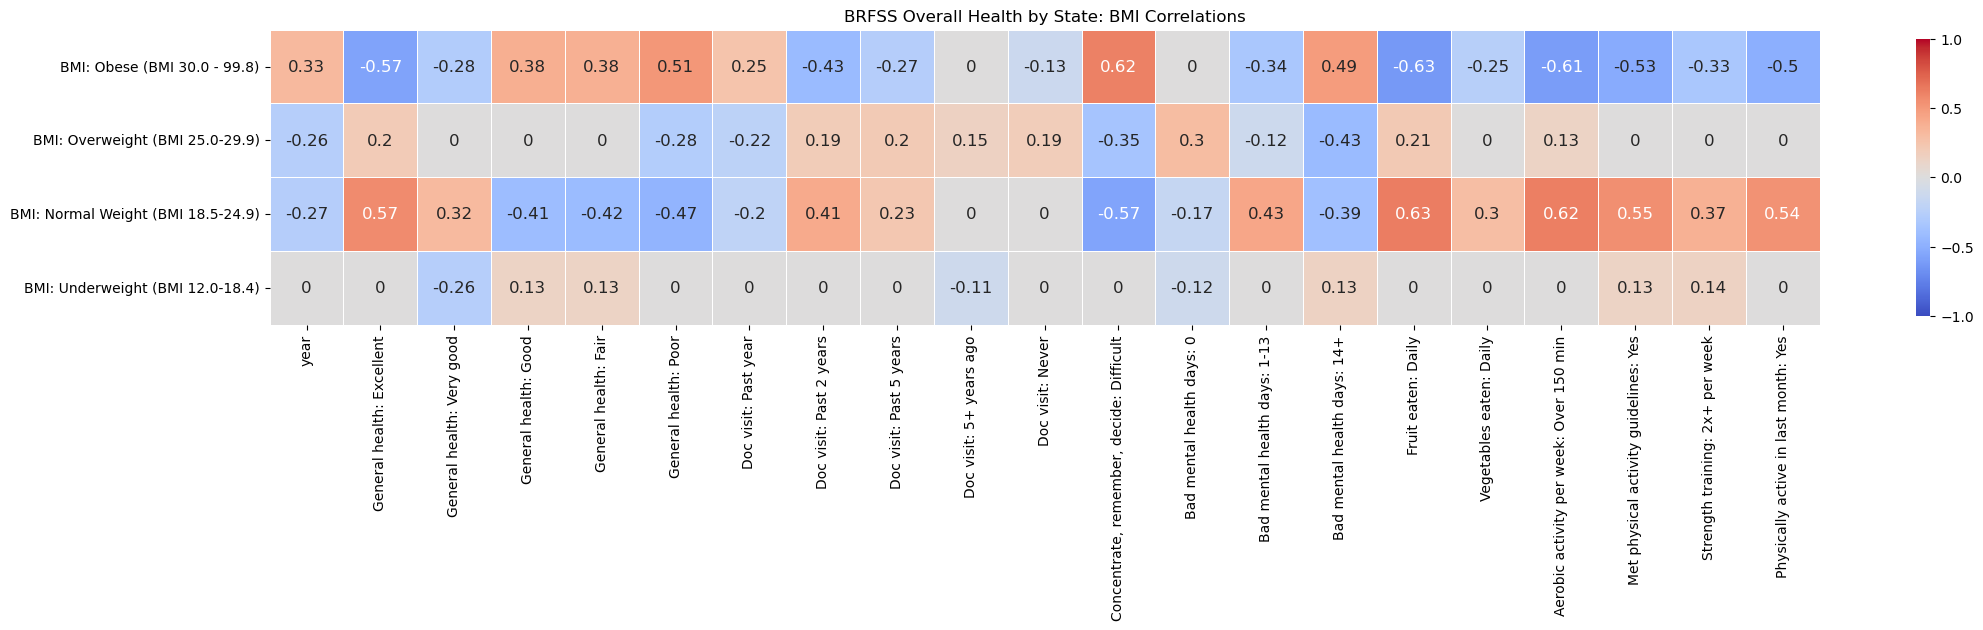

BMI: Obese (BMI 30.0 - 99.8)  correlations -  7  strong,  7  moderate,  5  weak,  19  total.
BMI: Overweight (BMI 25.0-29.9)  correlations -  0  strong,  3  moderate,  11  weak,  14  total.
BMI: Normal Weight (BMI 18.5-24.9)  correlations -  6  strong,  8  moderate,  5  weak,  19  total.
BMI: Underweight (BMI 12.0-18.4)  correlations -  0  strong,  0  moderate,  8  weak,  8  total.


In [40]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 9)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: BMI Correlations')

heatmap.figure.savefig('corr_heatline_BMI.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li><b>BMI: Obese and BMI: Normal weight have the most correlations.</b> <br>
    <li><b>BMI: Obese's and BMI: Normal weight's relative correlations have an inverse relationship with eachother</b> - i.e., for Genral health: Excellent, BMI: Obese has a strong negative correlation and BMI: Normal weight has a strong positive correlation. This inverse relationship exists in 15 variables.<br>
    <br>
        <b>The strongest correlations for BMIs exist in:</b><br>
    <li>Genral Health: Excellent<br>
    <li>Concentrate, remember, decide: Difficult<br>
    <li>Fruit eaten: Daily<br>
    <li>Aerobic activity per week: Over 150 min<br>
   </div>

### 4.3 General health heatline

In [45]:
# Making a correlation line

index_list = ['General health: Excellent',
              'General health: Very good',
              'General health: Good',
              'General health: Fair',
              'General health: Poor']

heatline = eva_corr[eva_corr.index.isin(index_list)]
heatline = heatline.drop(columns = index_list).copy()
heatline

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),Doc visit: Past year,Doc visit: Past 2 years,Doc visit: Past 5 years,Doc visit: 5+ years ago,Doc visit: Never,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
General health: Excellent,0.200750,-0.572027,0.195338,0.565827,0.000000,0.000000,0.452090,0.000000,-0.257015,-0.109136,-0.505136,0.208306,0.000000,-0.505754,0.457757,0.108900,0.474723,0.452853,0.296166,0.450376
General health: Very good,0.000000,-0.282873,0.000000,0.318066,-0.259399,0.000000,0.216158,0.000000,0.000000,-0.121267,-0.530329,-0.466647,0.683004,-0.189779,0.637769,0.647139,0.678181,0.573105,0.524986,0.756512
General health: Good,0.000000,0.384092,0.000000,-0.412667,0.126608,0.000000,-0.212820,0.000000,0.258056,0.217677,0.245825,0.113178,-0.273670,0.232289,-0.431532,-0.349428,-0.384137,-0.250298,-0.119885,-0.421167
General health: Fair,-0.122721,0.381786,0.000000,-0.415398,0.129242,0.183084,-0.329108,-0.154682,0.000000,0.000000,0.641318,0.330508,-0.600625,0.335716,-0.652918,-0.603594,-0.738968,-0.679279,-0.631604,-0.822300
General health: Poor,-0.236423,0.508218,-0.280865,-0.474996,0.000000,0.126665,-0.473146,-0.132283,0.199056,0.180371,0.731724,0.000000,-0.296193,0.679643,-0.547642,-0.175170,-0.518233,-0.530998,-0.434833,-0.577044


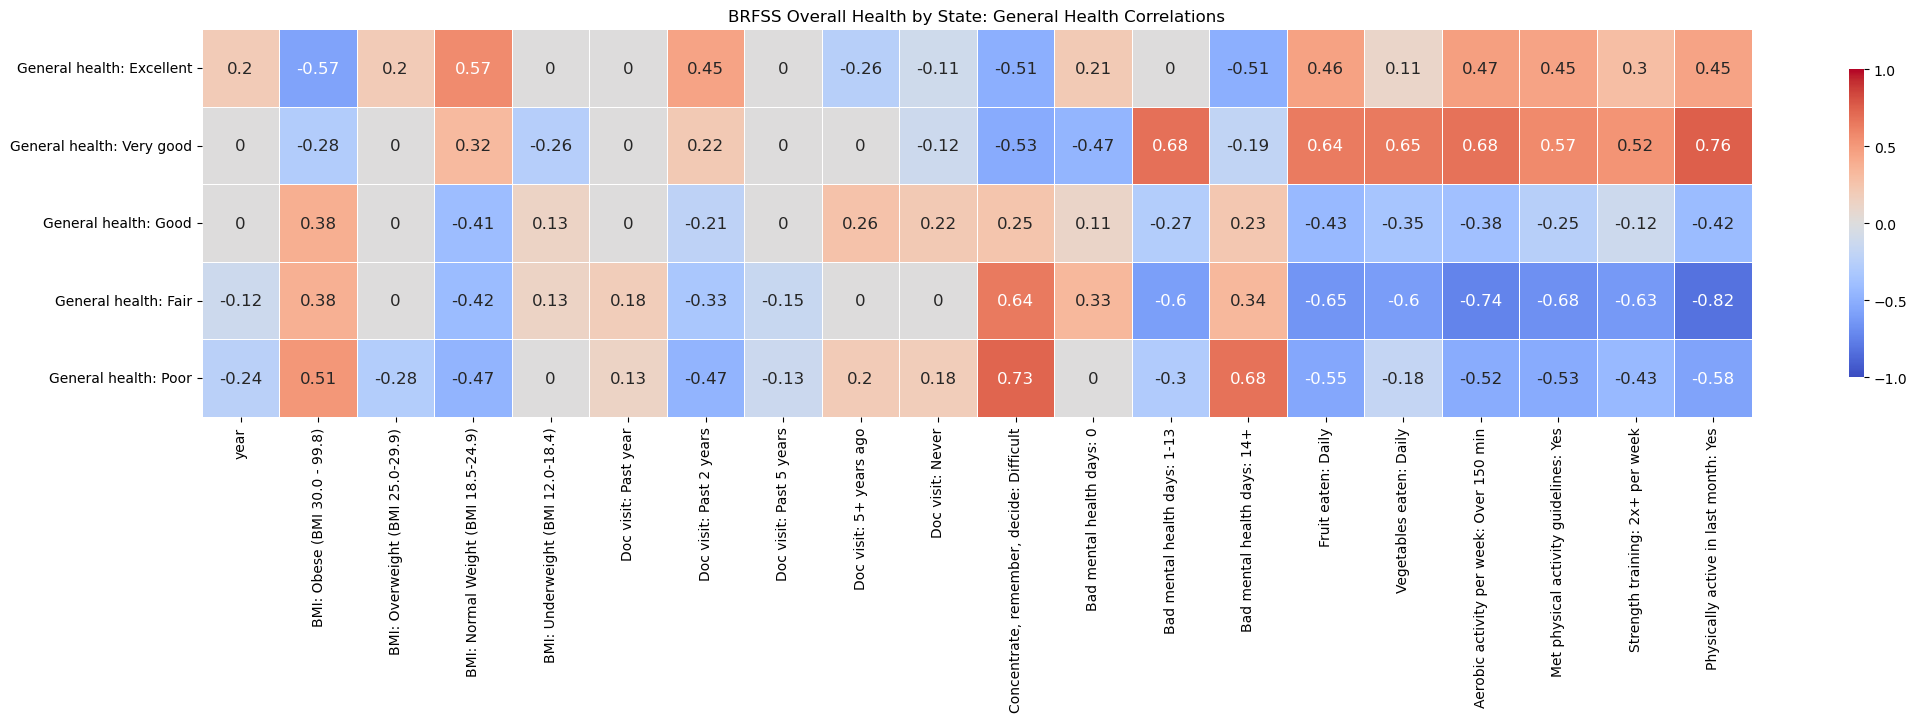

General health: Excellent correlations - 4 strong, 5 moderate, 7 weak, 16 total.
General health: Very good correlations - 8 strong, 2 moderate, 5 weak, 15 total.
General health: Good correlations - 0 strong, 6 moderate, 10 weak, 16 total.
General health: Fair correlations - 8 strong, 5 moderate, 4 weak, 17 total.
General health: Poor correlations - 7 strong, 3 moderate, 8 weak, 18 total.


In [46]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 10)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: General Health Correlations')

heatmap.figure.savefig('corr_heatline_GENHEALTH.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li><b>All general health responses have numerous correlations.</b> Very good and Fair have the most strong correlations.<br>
    <li><b>General health: Excellent's and General health: Poor's relative correlations have an inverse relationship with eachother</b> Everywhere Excellent has a positive correlation Poor has a negative correlation of similar strength, and visa-versa.<br>
    <li><b>General health: Very good's and General health: Fair's relative correlations have an inverse relationship with eachother</b> Everywhere Very good has a positive correlation Fair has a negative correlation of similar strength, and visa-versa.<br>
    <li><b>There is a positive/negative reversal that exists with Excellent and Very good on one side and Good, Fair, and Poor on the other.</b> Everywhere Excellent and Very good have a positive correlation Good, Fair, and Poor have a negative correlation, and visa-versa.<br>
    <br>
        <b>The strongest correlations for general health responses exist in:</b><br>
    <li>Concentrate, remember, decide: Difficult<br>
    <li>Bad mental health days: 1-13<br>
    <li>Fruit eaten: Daily<br>
    <li>Vegetables eaten: Daily<br>
    <li>All physical activity responses<br>
   </div>

### 4.4 Mental health heatline

In [47]:
# Making a correlation line

index_list = ['Concentrate, remember, decide: Difficult',
              'Bad mental health days: 0',
              'Bad mental health days: 1-13',
              'Bad mental health days: 14+']

heatline = eva_corr[eva_corr.index.isin(index_list)]
heatline = heatline.drop(columns = index_list).copy()
heatline

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,Doc visit: Past 2 years,Doc visit: Past 5 years,Doc visit: 5+ years ago,Doc visit: Never,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
"Concentrate, remember, decide: Difficult",0.228706,0.615905,-0.352458,-0.569585,0.000000,-0.505136,-0.530329,0.245825,0.641318,0.731724,...,-0.424103,-0.371285,-0.111616,0.0,-0.598489,-0.232944,-0.566244,-0.524304,-0.417936,-0.613407
Bad mental health days: 0,-0.160242,0.000000,0.302776,-0.168416,-0.115528,0.208306,-0.466647,0.113178,0.330508,0.000000,...,-0.129491,-0.175160,0.000000,0.0,-0.265608,-0.603882,-0.312948,-0.340315,-0.409289,-0.499579
Bad mental health days: 1-13,0.000000,-0.335352,-0.123959,0.429781,0.000000,0.000000,0.683004,-0.273670,-0.600625,-0.296193,...,0.311057,0.281179,0.000000,0.0,0.569348,0.645644,0.592730,0.651378,0.684266,0.743117
Bad mental health days: 14+,0.179699,0.488944,-0.425646,-0.386227,0.134047,-0.505754,-0.189779,0.232289,0.335716,0.679643,...,-0.260637,-0.113579,0.153079,0.0,-0.418227,0.135778,-0.336292,-0.376895,-0.308615,-0.225173


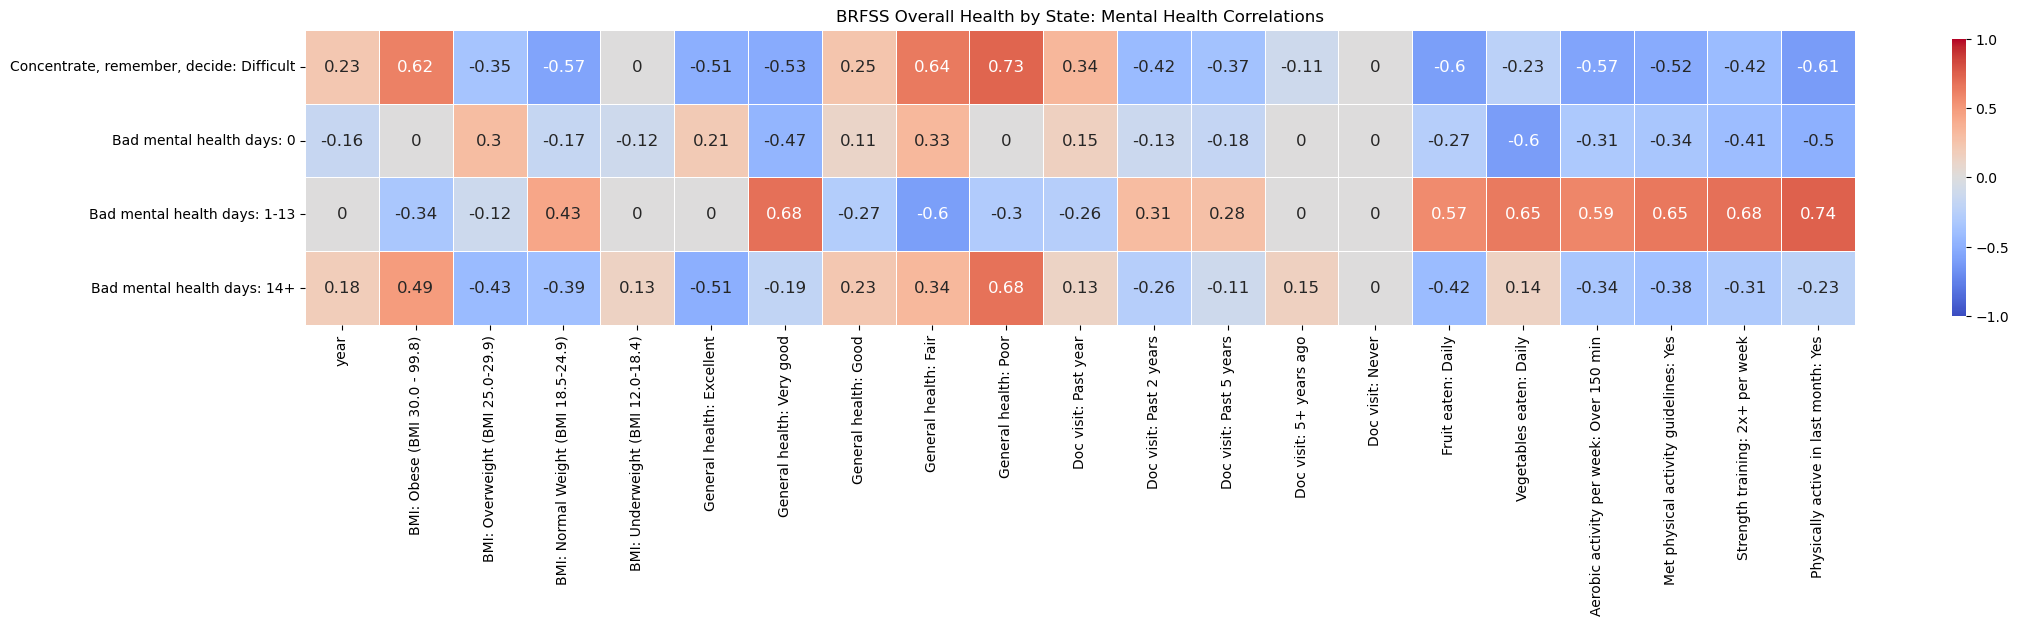

Concentrate, remember, decide: Difficult correlations - 10 strong, 5 moderate, 4 weak, 19 total.
Bad mental health days: 0 correlations - 1 strong, 7 moderate, 9 weak, 17 total.
Bad mental health days: 1-13 correlations - 8 strong, 3 moderate, 5 weak, 16 total.
Bad mental health days: 14+ correlations - 2 strong, 8 moderate, 10 weak, 20 total.


In [48]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 9)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Mental Health Correlations')

heatmap.figure.savefig('corr_heatline_MENTALHEALTH.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li><b>All mental health responses have numerous correlations.</b> Concentrate, remember, decide: Difficult and Bad mental health days: 1-13 have the most strong correlations.<br>
    <li><b>Bad mental health days: 1-13's and the other three responses' relative correlations have an inverse relationship with eachother.</b> Often where Bad mental health days: 1-13 has a positive correlation the other three have a negative correlation, and visa-versa. This inverse relationship is strongest between Bad mental health days: 1-13 and Concentrate, remember, decide: Difficult where many of their opposite correlations also have similar magnitudes.<br>
    <br>
    <b>The strongest correlations for mental health responses exist in:</b><br>
    <li>BMI: Obese<br>
    <li>General health: Very good<br>
    <li>General health: Fair<br>
    <li>Fruit eaten: Daily<br>
    <li>Vegetables eaten: Daily<br>
    <li>All physical activity responses<br>
   </div>

### 4.5 Dietary health heatline

In [49]:
# Making a correlation line

index_list = ['Fruit eaten: Daily',
              'Vegetables eaten: Daily']

heatline = eva_corr[eva_corr.index.isin(index_list)]
heatline = heatline.drop(columns = index_list).copy()
heatline

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,Doc visit: 5+ years ago,Doc visit: Never,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
Fruit eaten: Daily,0.0,-0.631581,0.214411,0.630186,0.0,0.457757,0.637769,-0.431532,-0.652918,-0.547642,...,-0.148078,0.0,-0.598489,-0.265608,0.569348,-0.418227,0.692593,0.628609,0.512835,0.675646
Vegetables eaten: Daily,0.0,-0.250785,0.000000,0.296571,0.0,0.108900,0.647139,-0.349428,-0.603594,-0.175170,...,0.000000,0.0,-0.232944,-0.603882,0.645644,0.135778,0.587610,0.515912,0.457010,0.581304


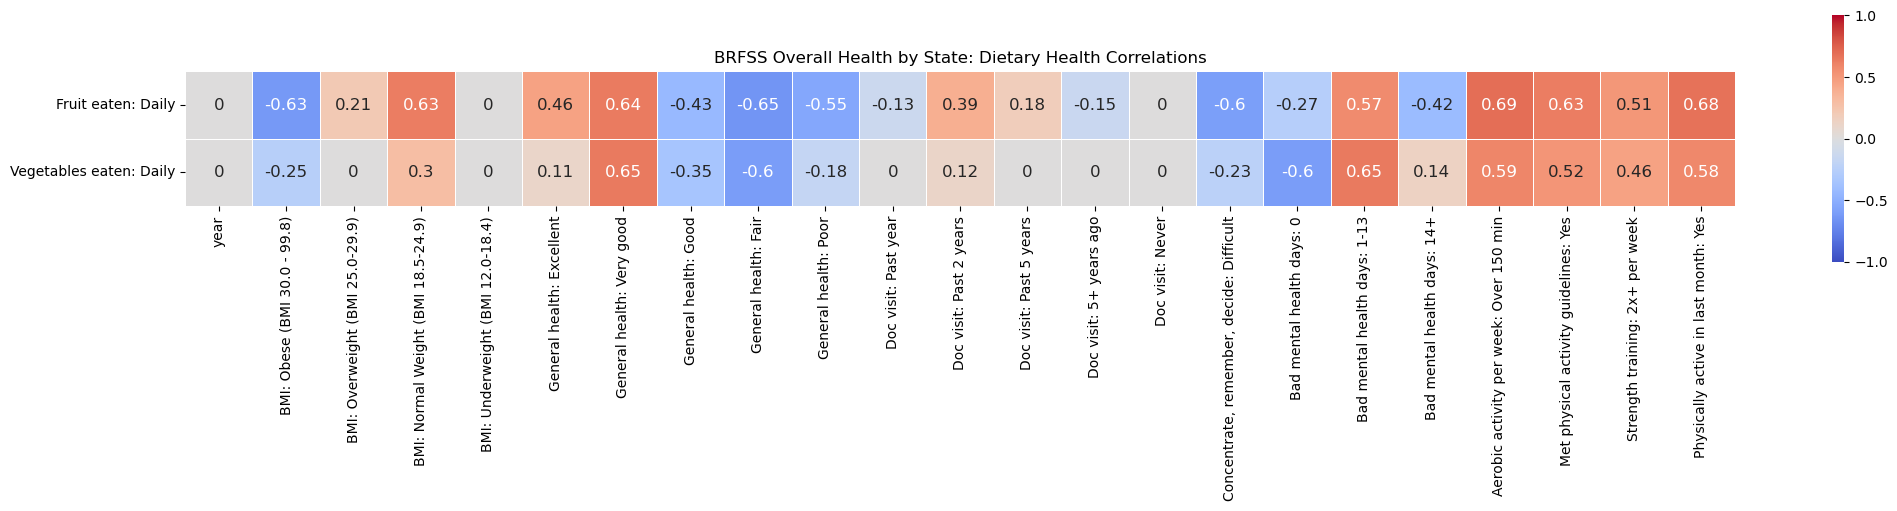

Fruit eaten: Daily correlations - 11 strong, 4 moderate, 5 weak, 20 total.
Vegetables eaten: Daily correlations - 7 strong, 2 moderate, 7 weak, 16 total.


In [50]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 8)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Dietary Health Correlations')

heatmap.figure.savefig('corr_heatline_DIETHEALTH.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li><b>Both dietary health responses have numerous correlations.</b> Fruit eaten: Daily has the most strong correlations - also the most strong correlations out of all variables in the analysis.<br>
    <li><b>Both dietary health responses are strongly correlated with each other</b> They almost always have the same polarity and often the same magnitude of correlation for each variable relationship.<br>
    <br>
    <b>The strongest correlations for dietary health responses exist in:</b><br>
    <li>BMI: Obese<br>
    <li>BMI: Normal weight<br>
    <li>General health: Very good<br>
    <li>General health: Fair<br>
    <li>Concentrate, remember, decide: Difficult<br>
    <li>Bad mental health days: 0<br>
    <li>Bad mental health days: 1-13<br>
    <li>All physical activity responses<br>
   </div>

### 4.6 Physical activity heatline

In [51]:
# Making a correlation line

index_list = ['Aerobic activity per week: Over 150 min',
              'Met physical activity guidelines: Yes',
              'Strength training: 2x+ per week',
              'Physically active in last month: Yes']

heatline = eva_corr[eva_corr.index.isin(index_list)]
heatline = heatline.drop(columns = index_list).copy()
heatline

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,Doc visit: Past 2 years,Doc visit: Past 5 years,Doc visit: 5+ years ago,Doc visit: Never,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily
Aerobic activity per week: Over 150 min,0.000000,-0.606930,0.13231,0.623339,0.000000,0.474723,0.678181,-0.384137,-0.738968,-0.518233,...,0.510856,0.342979,0.14735,0.0,-0.566244,-0.312948,0.592730,-0.336292,0.692593,0.587610
Met physical activity guidelines: Yes,0.229031,-0.529572,0.00000,0.553894,0.127406,0.452853,0.573105,-0.250298,-0.679279,-0.530998,...,0.307770,0.154278,0.00000,0.0,-0.524304,-0.340315,0.651378,-0.376895,0.628609,0.515912
Strength training: 2x+ per week,0.412712,-0.332199,0.00000,0.372165,0.138107,0.296166,0.524986,-0.119885,-0.631604,-0.434833,...,0.110692,0.000000,0.00000,0.0,-0.417936,-0.409289,0.684266,-0.308615,0.512835,0.457010
Physically active in last month: Yes,0.103127,-0.501806,0.00000,0.535242,0.000000,0.450376,0.756512,-0.421167,-0.822300,-0.577044,...,0.454532,0.295150,0.00000,0.0,-0.613407,-0.499579,0.743117,-0.225173,0.675646,0.581304


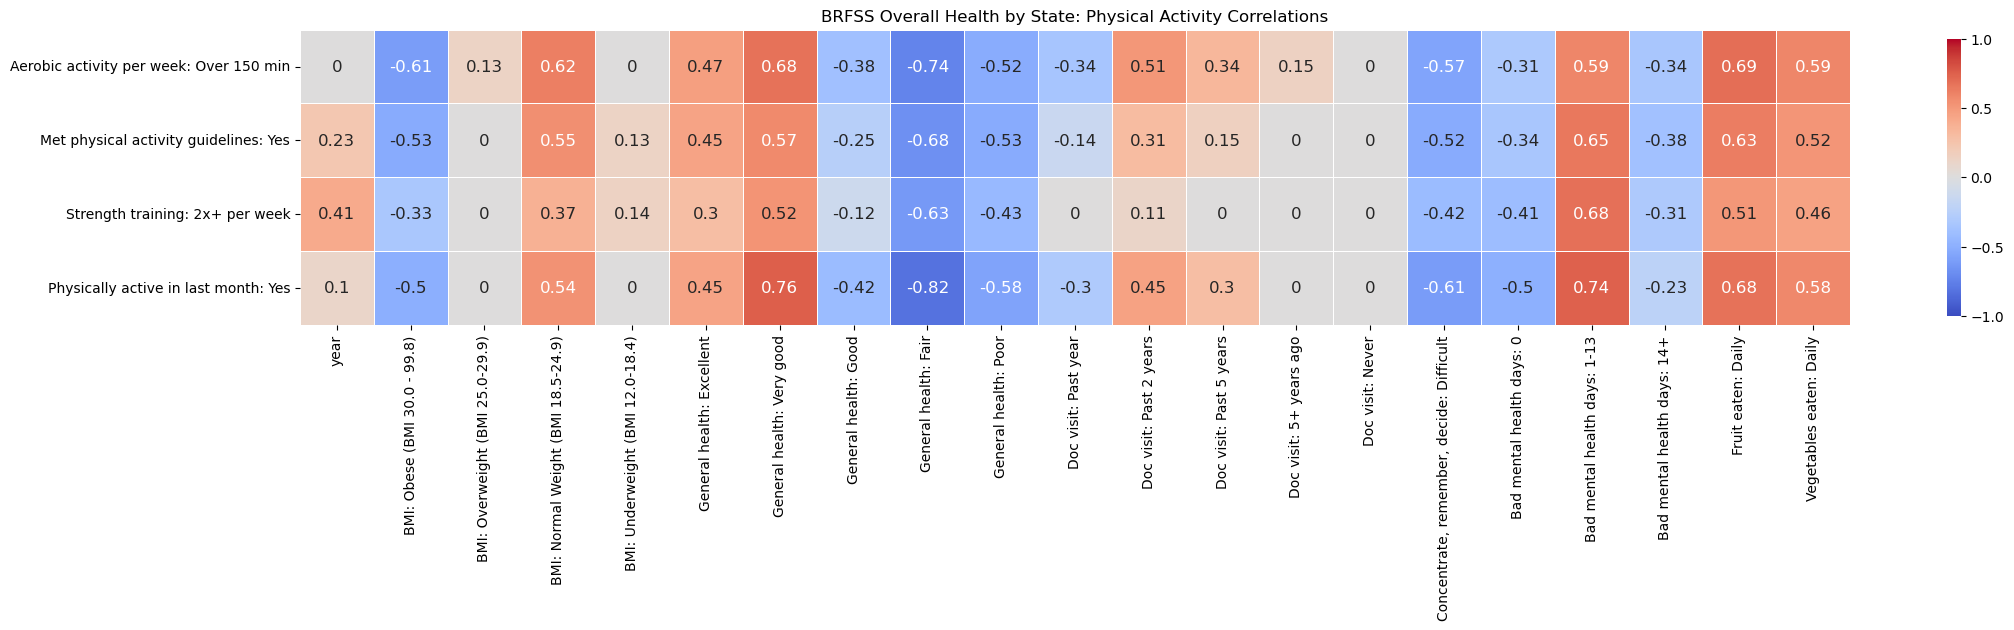

Aerobic activity per week: Over 150 min correlations - 10 strong, 6 moderate, 2 weak, 18 total.
Met physical activity guidelines: Yes correlations - 9 strong, 4 moderate, 5 weak, 18 total.
Strength training: 2x+ per week correlations - 4 strong, 8 moderate, 4 weak, 16 total.
Physically active in last month: Yes correlations - 9 strong, 4 moderate, 4 weak, 17 total.


In [52]:
# Plotting heatline

f, ax = plt.subplots(figsize=(25, 9)) 
heatmap = sns.heatmap(heatline, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(heatline.index, rotation = 0)
ax.set_xticklabels(heatline.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('BRFSS Overall Health by State: Physical Activity Correlations')

heatmap.figure.savefig('corr_heatline_PHYSACTIVITY.png')
plt.show()

# printing number of strong, moderate, weak, and total correlations per variable in the category
for indices, row in heatline.iterrows():
    strong = 0
    moderate = 0
    weak = 0
    for col in heatline.columns:
        if abs(heatline.at[indices,col]) >= 0.5:
            strong += 1
        elif abs(heatline.at[indices,col]) >= 0.3:
            moderate += 1
        elif abs(heatline.at[indices,col]) >= 0.1:
            weak += 1
    print(indices, 'correlations -', strong, 'strong,', moderate, 'moderate,', weak, 'weak,', strong+moderate+weak, 'total.')

<div class='alert alert-block alert-info'>
    <li><b>All physical activity responses have numerous correlations.</b> Strength training 2x+ per week has the fewest strong correlations.<br>
    <li><b>All physical activity responses are strongly correlated with each other</b> They almost always have the same polarity and often the same magnitude of correlation for each variable relationship.<br>
    <li><b>The physical activity and dietary health responses are strongly correlated with each other</b> They almost always have the same polarity and often the same magnitude of correlation for each variable relationship.<br>
    <br>
    <b>The strongest correlations for mental health responses exist in:</b><br>
    <li>BMI: Obese<br>
    <li>BMI: Normal weight<br>
    <li>General health: Very good<br>
    <li>General health: Fair<br>
    <li>General health: Poor<br>
    <li>Concentrate, remember, decide: Difficult<br>
    <li>Bad mental health days: 1-13<br>
    <li>Fruit eaten: Daily<br>
    <li>Vegetables eaten: Daily<br>
   </div>

# Pair plot

In [ ]:
#Making a pair plot of eva

pair_plot = sns.pairplot(eva)

In [ ]:
pair_plot.savefig('pair_plot.png')

# 6. Conclusion

<div class='alert alert-block alert-warning'>
    <b>Summary</b><br><br>
    <li><b>Mental health, dietary health, and physical activity categories have the greatest number of strong correlations.</b><br>
    <li><b>BMI, mental health, and physical activity categories have the greatest number of moderate correlations.</b><br>
    <br>
    <li>BMI: Obese and BMI: Normal weight have opposite correlative relationships with the other variables.<br>
    <li>General health: Excellent and General health: Poor have opposite correlative relationships with the other variables.<br>
    <li>General health: Very good and General health: Fair have opposite correlative relationships with the other variables.<br>
    <li>Bad mental health days: 1-13 and the other three mental health responses have opposite correlative relationships to the other variables.<br>
    <li>Fruit eaten: Daily and Vegetables eaten: Daily are strongly correlated with each other.<br>              
    <li>All physical activity variables are strongly correlated with eachother.<br>              
    <br>
    <li>Genral health is strongly correlated with mental health, dietary health, and physical activity.<br>
    <li>Mental health is strongly correlated with obesity, very good and fair general health, dietary health, and physical activity.<br>
    <li>Dietary health is strongly correlated with BMI, general health, mental health, and physical activity.<br>
    <li>Physical activity is strongly correlated with BMI, general health, mental health, and dietary health.<br>
   </div>

<div class='alert alert-block alert-success'>
    <b>Next steps</b><br><br>
    <li>Run linear regressions on the strongest correlated pairs (section 3.3)<br>
    <li><b>Prioritize mental health and physical activity categories</b>, followed by dietary health and BMI categories, for further analysis due to the amount of strong correlations they have.<br>
    <li>Conduct a temporal analysis to examine year correlations.<br>
    <li><b>Look more into Fruit eaten: Daily</b> as it has the most strong correlations of the variables.<br>
   </div>